## Text-to-Image Generation using Stable Diffusion and Diffusers



In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

C:\Users\Faisa\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!pip show torch

Name: torch
Version: 2.6.0+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\Users\Faisa\AppData\Roaming\Python\Python313\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: accelerate, torchaudio, torchvision


In [4]:
from diffusers import StableDiffusionPipeline
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"

# Use CPU mode with float32 for compatibility
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float32)
pipe = pipe.to("cpu")

# Generate an image
prompt = "A futuristic city skyline at sunset"
image = pipe(prompt).images[0]
image.show()


100%|██████████| 50/50 [24:59<00:00, 29.98s/it]


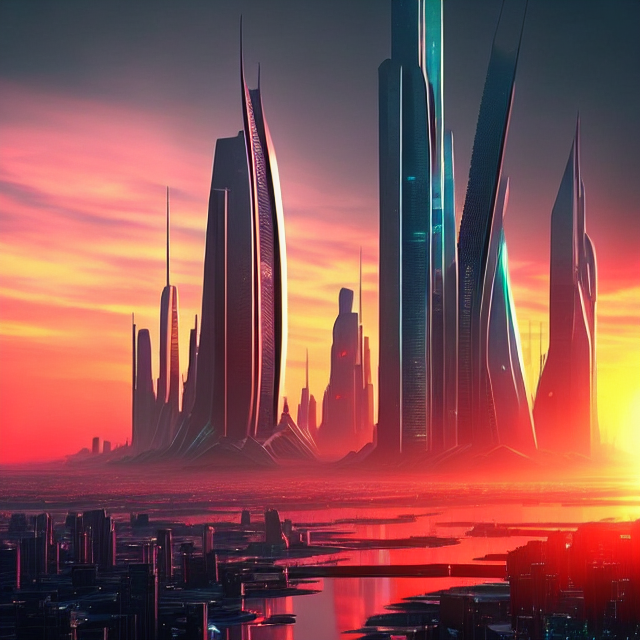

In [5]:
image

In [6]:
from diffusers import StableDiffusionPipeline
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"

# Use CPU mode with float32 for compatibility
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float32)
pipe = pipe.to("cpu")

prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

Loading pipeline components...: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


In [9]:
image = pipe(prompt).images[0]

100%|██████████| 50/50 [15:53<00:00, 19.07s/it]


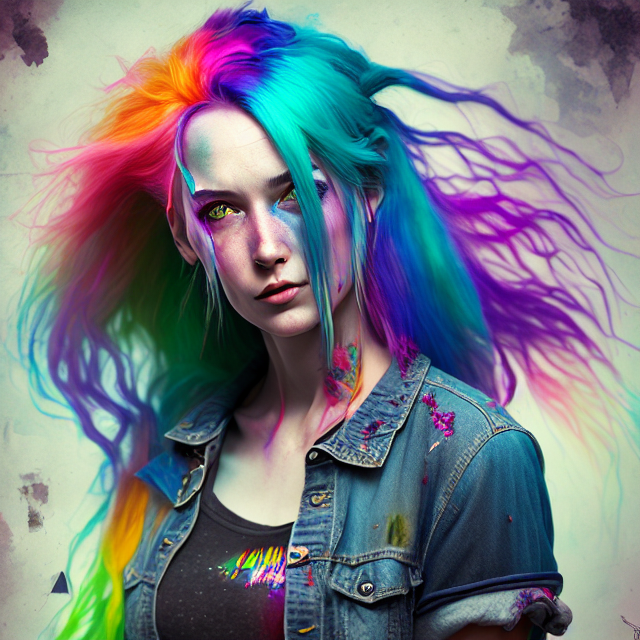

In [10]:
image

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"

# Use CPU mode with float32 for compatibility
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float32)
pipe = pipe.to("cpu")

prompt = ""

Loading pipeline components...: 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]


In [8]:
image = pipe(prompt).images[0]

100%|██████████| 50/50 [19:09<00:00, 23.00s/it]


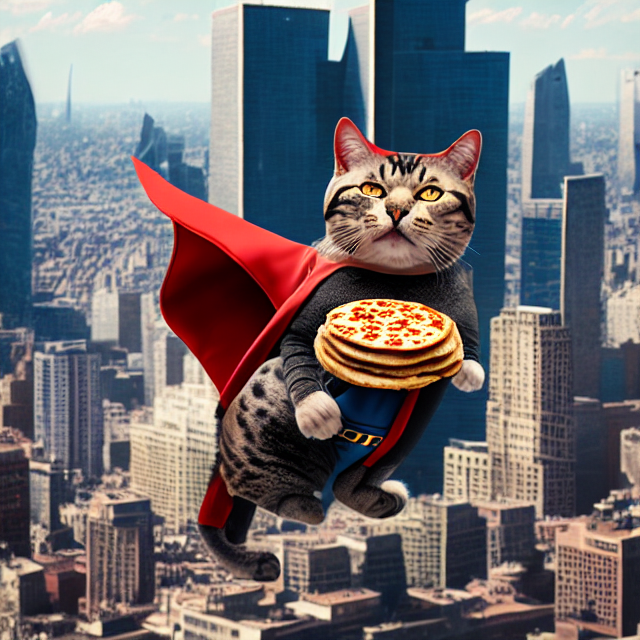

In [9]:
image

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



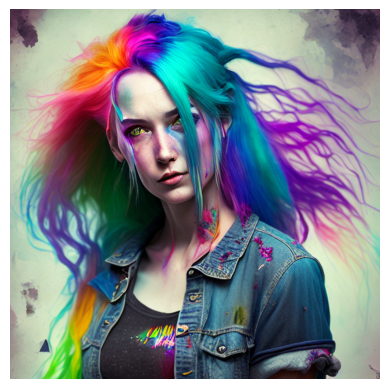

In [11]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [12]:
prompt2 = """A king of dholakpur  and Chhota Bheem   fighting a 3rd year student of computer science
"""

image = pipe(prompt2).images[0]

100%|██████████| 50/50 [18:34<00:00, 22.28s/it]


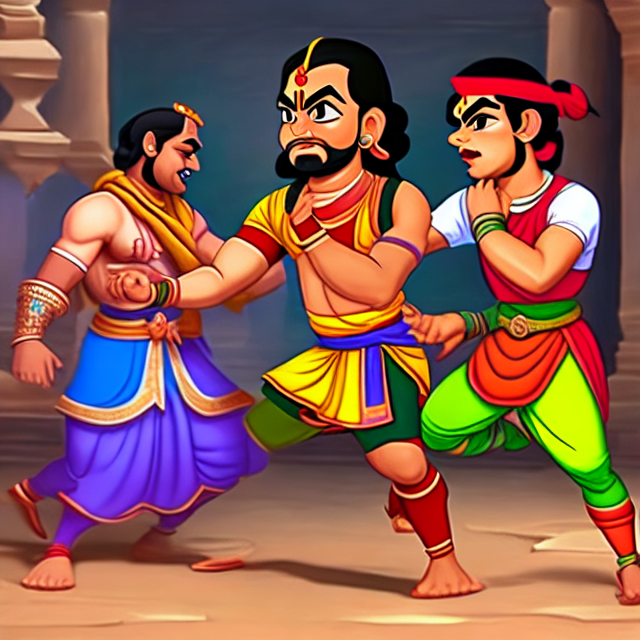

In [13]:
image

[PROMPT]:  A king of dholakpur  and Chhota Bheem   fighting a 3rd year student of computer science



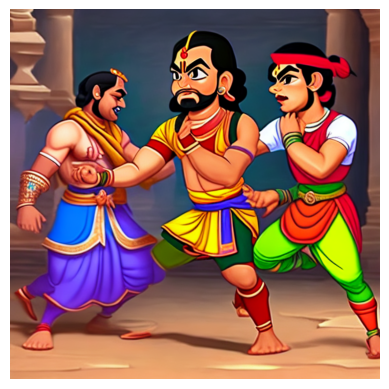

In [14]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [15]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [16]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

100%|██████████| 50/50 [19:10<00:00, 23.00s/it]


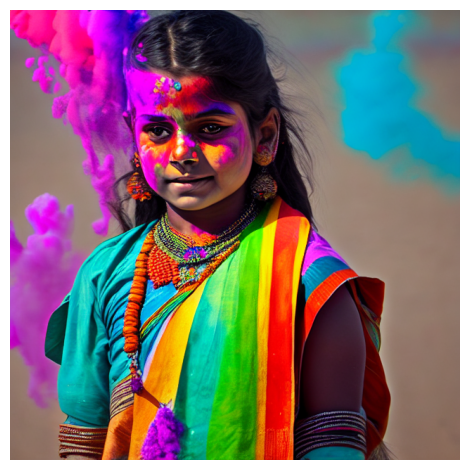

In [17]:
generate_image(pipe, prompt, params)

In [22]:
prompt = "the first man adam versus evil that is made of fire"

params = {}

In [ ]:
generate_image(pipe, prompt, params)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

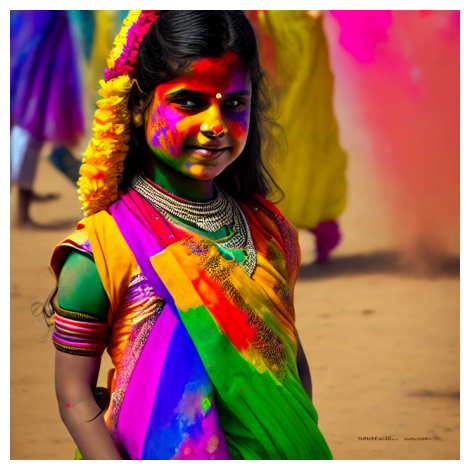

In [ ]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

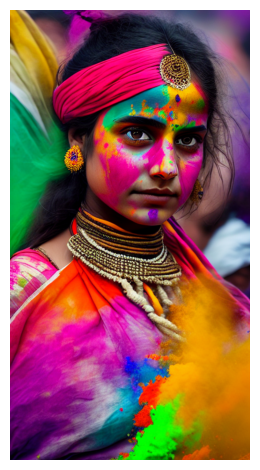

In [ ]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

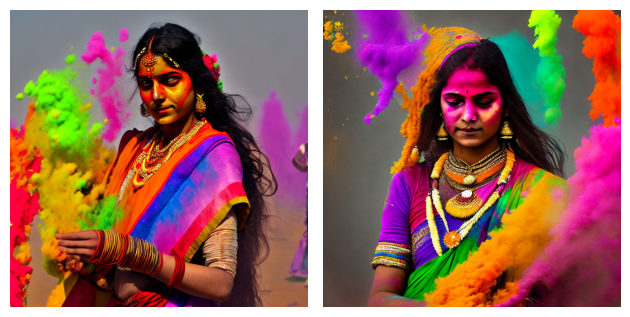

In [ ]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

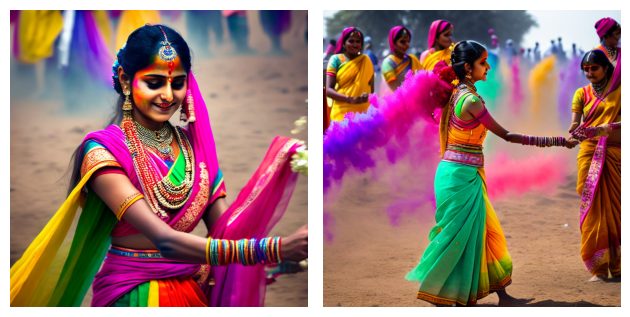

In [ ]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

In [ ]:
from pymongo import MongoClient
from diffusers import StableDiffusionPipeline
import torch

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["image_database"]
collection = db["generated_images"]

# Model setup
model_id = "dreamlike-art/dreamlike-diffusion-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Image generation
prompt = "A futuristic city skyline at sunset"
image = pipe(prompt).images[0]

# Save image and metadata
image.save("generated_image.png")
collection.insert_one({"prompt": prompt, "file_path": "generated_image.png"})
print("Image and metadata saved successfully!")